In [1]:
%matplotlib inline

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op

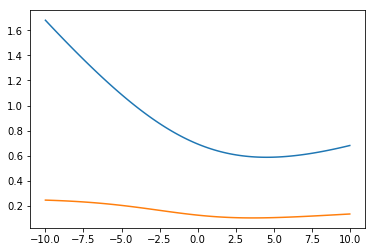

In [4]:
# Example showing that the log loss is convex while the mean square loss is wavy
# for 2 data points in of a single predictor
th = np.linspace(-10,10, num=100)
x1=0.3
x2=0.1
y1=1
y2=0
h_theta1 = 1/(1+np.exp(-th * x1))
h_theta2 = 1/(1+np.exp(-th * x2))
J_logis = -(1/2) * (y1 * np.log(h_theta1) + (1-y2) * (np.log(1 - h_theta2)))
J_square = (1/4) * ((h_theta1 - y1)**2 + (h_theta2 - y2)**2)
plt.plot(th, J_logis) # convex, y=1
plt.plot(th, J_square) # non-convex, y=1

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-1 * x))

In [192]:
def logLoss(pred, target):
    nSample = np.size(target,0)
    J = -(1/nSample) * (target.T.dot(np.log(pred+0.00001)) + (1-target).T.dot(np.log(1.000001-pred)))
    return J, pred - target
def predLogitFn(X, weights):
    z = X.dot(weights)
    pred = sigmoid(z)
    return pred

In [193]:
def computeCost(X, target, weights, predFn, costFn):
    """
    Inputs: X design matrix 2D matrix, target: dependent variables 1D vector, weights or theta: 
    Output:
    """
    nSample = np.size(target,0) # sample size
    pred = predFn(X, weights) # predictions based on given weights
    eps = pred - target # residuals
    error = costFn(pred, target)
    return error, eps # cost/loss/error, residual vector

In [211]:
def gradientDescent(X, Y, theta, predFn, costFn):
    nSample = np.size(X,0) # sample size
    pred = predFn(X, theta)
    error, eps = costFn(pred, Y)
    gradient = (1./nSample) * X.T * eps
    weightUpdate = gradient
    return gradient, error

In [212]:
def gradientDescentVis(X, Y, theta, alpha, predFn, costFn, nIter):
    cost = np.zeros(nIter)
    for i in range(nIter):
        grad, cost[i] = gradientDescent(X, Y, theta, predFn, costFn)
        theta = theta - alpha * grad
    return cost

In [213]:
def pred(X, weights):
    p = sigmoid(X.dot(weights))
    return np.matrix(p >= 0.5, dtype=float)

In [214]:
X = np.matrix([[1, 1], [1, 2.5], [1, 3], [1, 4]])
theta = np.matrix([[-3.5], [1.3]])


In [215]:
m3 = np.matrix([[8.,     1.,     6.],
     [3.,     5.,     7.],
     [4.,     9.,     2.]])
X = np.concatenate((np.ones((3,1)), m3), axis=1)
Y = np.matrix([[1], [0], [1]])
theta = np.matrix([-2, -1, 1, 2]).T

In [216]:
(a,b) = gradientDescent(X, Y, theta, predLogitFn, logLoss)

In [217]:
alpha, nIter = (0.01, 400)
c = gradientDescentVis(X, Y, theta, alpha, predLogitFn, logLoss, nIter)

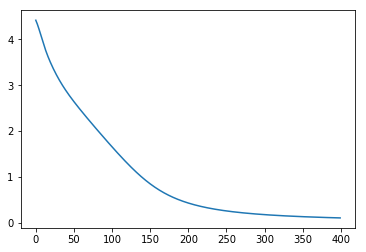

In [218]:
plt.plot(c)

In [202]:
(data[data[2]==0])[]

SyntaxError: invalid syntax (<ipython-input-202-b2c6f0cc9112>, line 1)

In [203]:
data = pd.read_csv("data/ex2data1.txt", header=None)

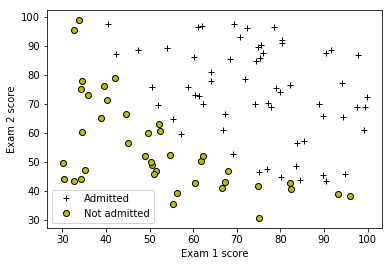

In [210]:
fig1 = plt.figure
plt.plot(data[data[2]==1][0], data[data[2]==1][1], 'b+', ls='None', color='black', label='Admitted')
plt.plot(data[data[2]==0][0], data[data[2]==0][1], 'yo', ls='None', mec='black', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

In [207]:
X=np.matrix([data[0],data[1]]).T
Y=np.matrix(data[2]).T
thetaInit = np.matrix([0.01,0.02]).T
alpha, nIter = (0.01, 400)
c = gradientDescentVis(X, Y, thetaInit, alpha, predLogitFn, logLoss, nIter)

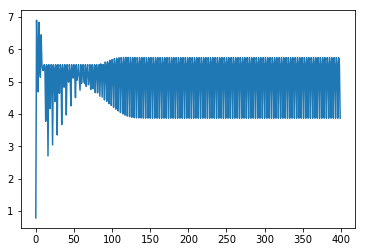

In [208]:
plt.plot(c)

In [ ]:
op.fmin_bfgs

In [225]:
A = np.matrix([[1,1],[1,1]])
B = np.matrix([1,1])
B * A

matrix([[2, 2]])